# Data Preparation

Dataset: https://www.kaggle.com/datasets/nasa/astronaut-yearbook/data

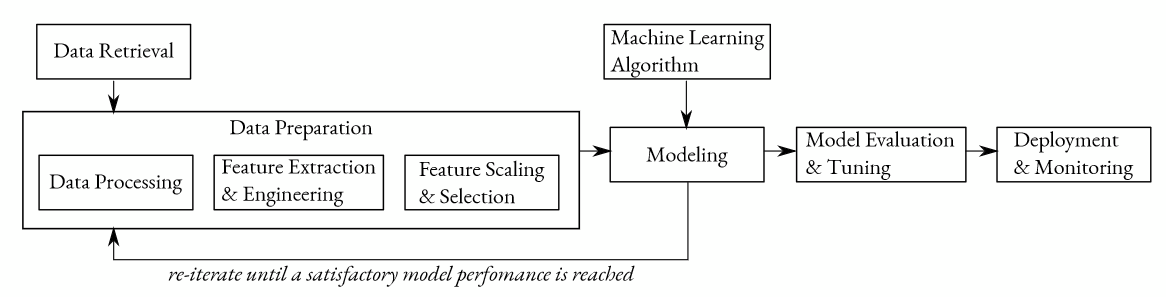

Download the dataset:

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

!kaggle datasets download -d nasa/astronaut-yearbook -p {'.'}

  0% 0.00/20.3k [00:00<?, ?B/s]
100% 20.3k/20.3k [00:00<00:00, 5.56MB/s]


In [ ]:
import zipfile

dataset_path = '/content/data_preparation_exercise/'
#os.mkdir(dataset_path)

with zipfile.ZipFile('astronaut-yearbook.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [ ]:
import pandas as pd

csv_filepath = dataset_path + 'astronauts.csv'
df = pd.read_csv(csv_filepath)
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


## 0. Data Exploration

- get insights to your dataset


In [ ]:
df.describe()

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,330.000000,330.000000,357.000000,357.000000,357.000000,357.000000
mean,1985.106061,11.409091,2.364146,1249.266106,1.246499,7.707283
std,13.216147,5.149962,1.428700,1896.759857,2.056989,13.367973
min,1959.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,8.000000,1.000000,289.000000,0.000000,0.000000
50%,1987.000000,12.000000,2.000000,590.000000,0.000000,0.000000
75%,1996.000000,16.000000,3.000000,1045.000000,2.000000,12.000000
max,2009.000000,20.000000,7.000000,12818.000000,10.000000,67.000000


In [ ]:
df.info()
# displays missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

Plot amount of Males vs. Females:

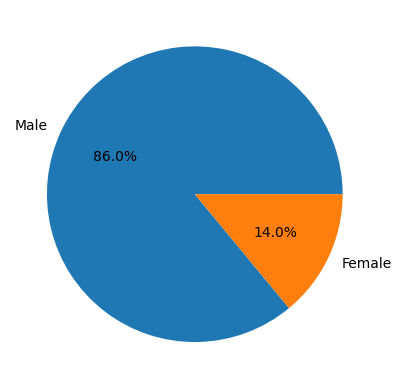

In [ ]:
import matplotlib.pyplot as plt

default_plt_size = plt.rcParams['figure.figsize']

plt.pie(df['Gender'].value_counts().values, labels=df['Gender'].value_counts().index, autopct='%.1f%%')
plt.show()

Plot histogram of values of one feature (1 column):

<Axes: xlabel='Space Flight (hr)', ylabel='Count'>

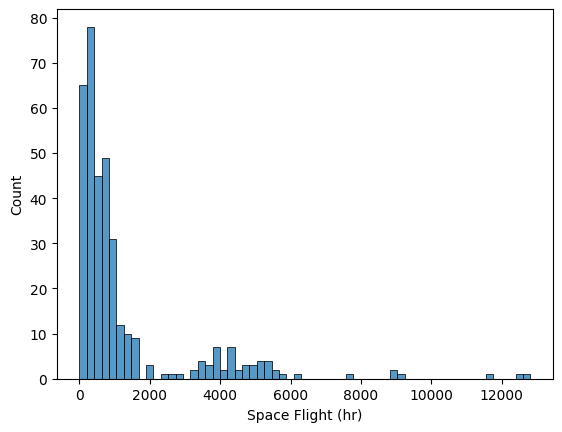

In [ ]:
import seaborn as sns

sns.histplot(data=df, x='Space Flight (hr)')

What are some parameters we can add?

<Axes: xlabel='Space Flight (hr)', ylabel='Count'>

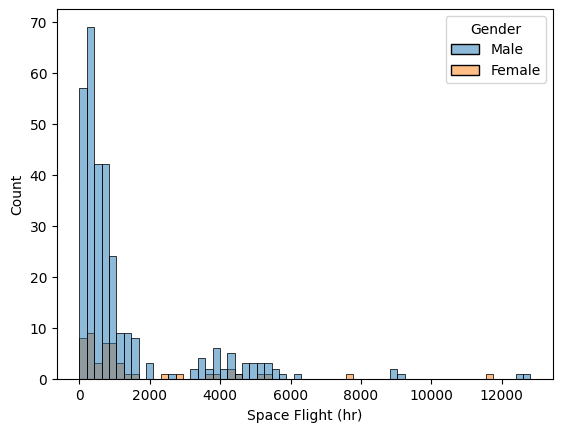

In [ ]:
# coloured division of Male vs. Female values
sns.histplot(data=df, x='Space Flight (hr)', hue='Gender')

<Axes: xlabel='Space Flight (hr)', ylabel='Count'>

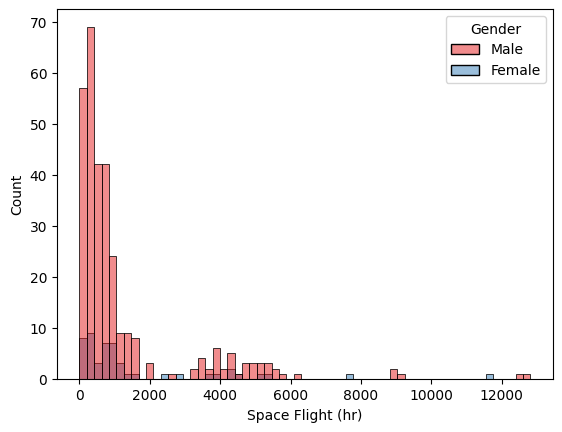

In [ ]:
# changing colour palette
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.histplot(data=df, x='Space Flight (hr)', hue='Gender', palette='Set1')

<Axes: xlabel='Space Flight (hr)', ylabel='Count'>

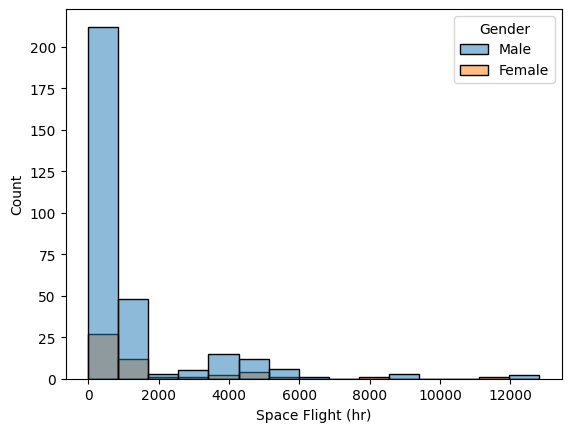

In [ ]:
# changing the size od bins
sns.histplot(data=df, x='Space Flight (hr)', bins=15, hue='Gender')

Plot multiple histograms:

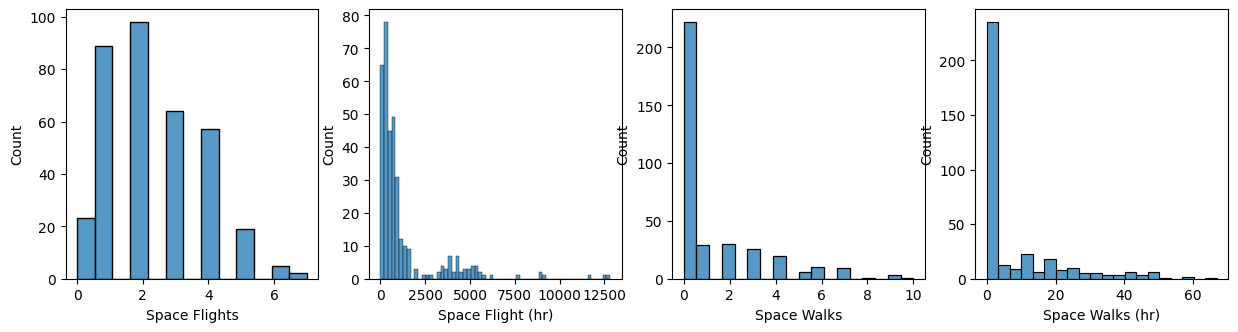

In [ ]:
plt.rcParams['figure.figsize'] = [15, 3.5]
fig, axes = plt.subplots(1, 4)

sns.histplot(df['Space Flights'],     ax=axes[0])
sns.histplot(df['Space Flight (hr)'], ax=axes[1])
sns.histplot(df['Space Walks'],       ax=axes[2])
sns.histplot(df['Space Walks (hr)'],  ax=axes[3])

fig.show()

Make it smoother (=> kernel density estimate plot):

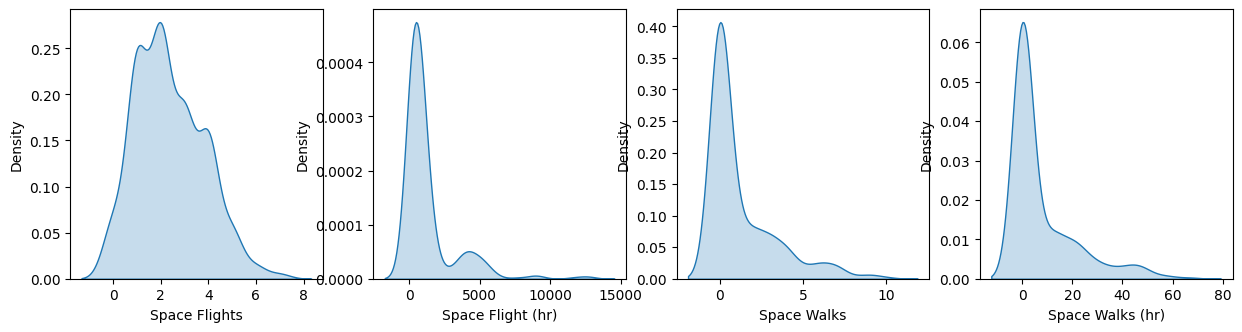

In [ ]:
plt.rcParams['figure.figsize'] = [15, 3.5]
fig, axes = plt.subplots(1, 4)

sns.kdeplot(df['Space Flights'],     ax=axes[0], fill=True)
sns.kdeplot(df['Space Flight (hr)'], ax=axes[1], fill=True)
sns.kdeplot(df['Space Walks'],       ax=axes[2], fill=True)
sns.kdeplot(df['Space Walks (hr)'],  ax=axes[3], fill=True)

fig.show()

*Note: the smoothing might not be the best - here it looks like we have negative values for e.g. `Space Flights` (where the minimum is actually at 0).*

In [ ]:
df['Space Flights'].value_counts().rename('count').to_frame().sort_index()

,count
0,23
1,89
2,98
3,64
4,57
5,19
6,5
7,2


We can also look at the density plot w.r.t. to e.g. `Gender`:

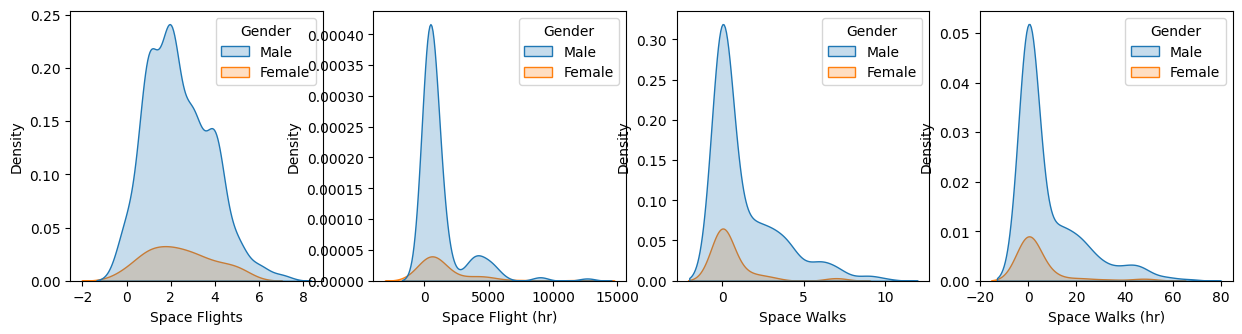

In [ ]:
plt.rcParams['figure.figsize'] = [15, 3.5]
fig, axes = plt.subplots(1, 4)

sns.kdeplot(df, x='Space Flights',     ax=axes[0], fill=True, hue='Gender')
sns.kdeplot(df, x='Space Flight (hr)', ax=axes[1], fill=True, hue='Gender')
sns.kdeplot(df, x='Space Walks',       ax=axes[2], fill=True, hue='Gender')
sns.kdeplot(df, x='Space Walks (hr)',  ax=axes[3], fill=True, hue='Gender')

fig.show()

Or some other feature:

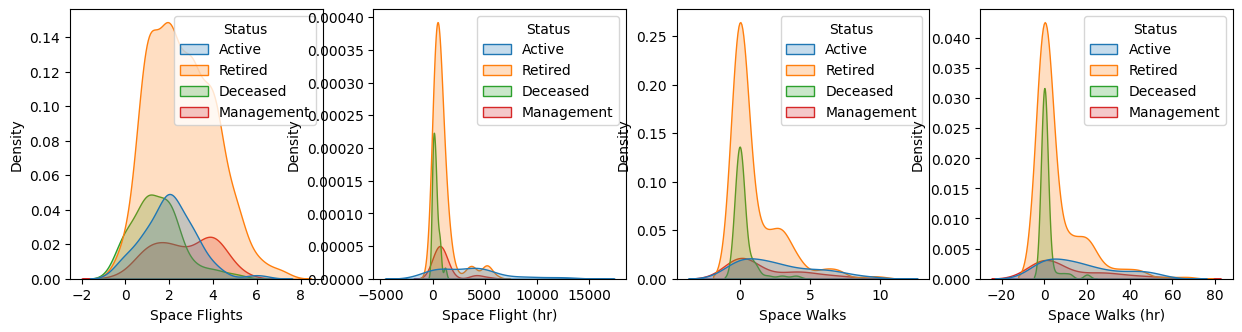

In [ ]:
plt.rcParams['figure.figsize'] = [15, 3.5]
fig, axes = plt.subplots(1, 4)

sns.kdeplot(df, x='Space Flights',     ax=axes[0], fill=True, hue='Status')
sns.kdeplot(df, x='Space Flight (hr)', ax=axes[1], fill=True, hue='Status')
sns.kdeplot(df, x='Space Walks',       ax=axes[2], fill=True, hue='Status')
sns.kdeplot(df, x='Space Walks (hr)',  ax=axes[3], fill=True, hue='Status')

fig.show()

Or we can add the KDE directly to a histogram:

<Axes: xlabel='Space Flight (hr)', ylabel='Count'>

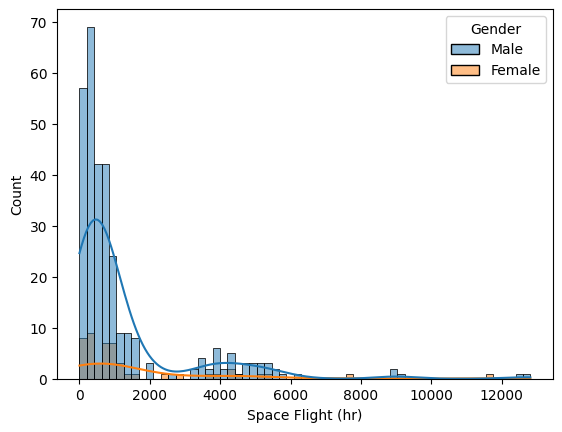

In [ ]:
plt.rcParams['figure.figsize'] = default_plt_size
sns.histplot(data=df, x='Space Flight (hr)', hue='Gender', kde=True)

Or we can also have a look at two features at once using two-dimensional KDE plot:

- the color-coding shows us how likely we are to see different combinations of the corresponding feaure values, where the **darker parts of the figure are more likely** to be observed

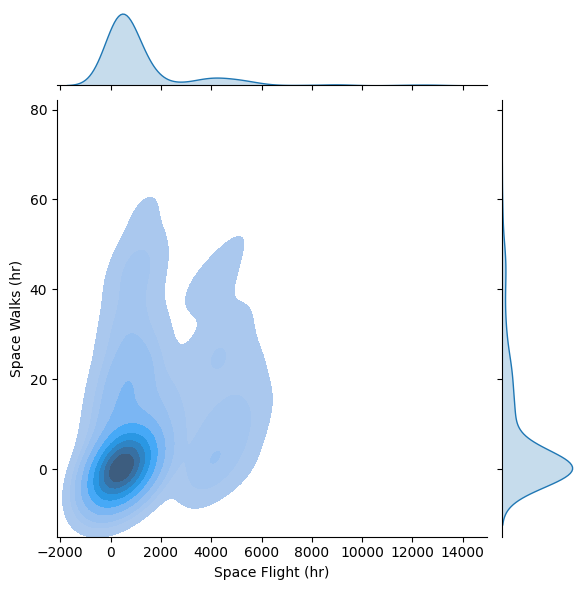

In [ ]:
sns.jointplot(x=df['Space Flight (hr)'], y=df['Space Walks (hr)'], kind='kde', fill=True)

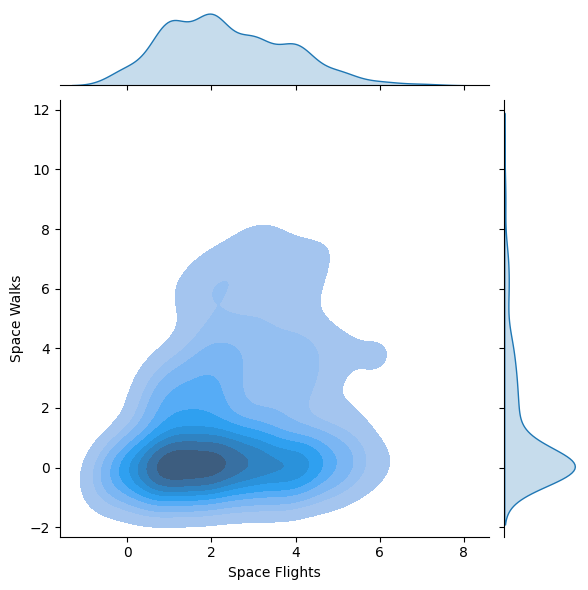

In [ ]:
sns.jointplot(x=df['Space Flights'], y=df['Space Walks'], kind='kde', fill=True)

#### Try answering some concrete questions:

A. Was somebody on more than one `Mission`s?

(hint: Missions would be separated by a comma.)

In [ ]:
df.iloc[0:4]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN


In [ ]:
def count_missions(missions_str):
  return len(missions_str.split(',')) if type(missions_str) == str else 0  # in case there is a NaN

count_missions(df.iloc[0]['Missions'])

2

In [ ]:
df['Missions Count'] = df.apply(lambda row: count_missions(row['Missions']), axis=1)
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,2
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,2
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,4
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,3
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN,0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,6


In [ ]:
df.loc[df['Missions Count'] > 1]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,2
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,2
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,4
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,2
5,Andrew M. Allen,1987.0,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Stephanie D. Wilson,1996.0,16.0,Active,9/27/1966,"Boston, MA",Female,Harvard University; University of Texas,Engineering Science,Aerospace Engineering,NaN,NaN,3,1031,0,0.0,"STS-121 (Discovery), STS-120 (Discovery), STS-...",NaN,NaN,3
351,Peter J. K. Wisoff,1990.0,13.0,Retired,8/16/1958,"Norfolk, VA",Male,University of Virginia; Stanford University,Physics,Applied Physics,NaN,NaN,4,1064,3,20.0,"STS-57 (Endeavor), STS-68 (Endeavor), STS-81 (...",NaN,NaN,4
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,3
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,6


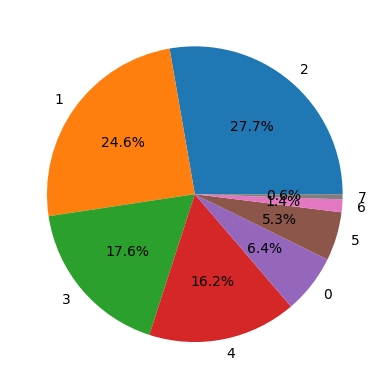

In [ ]:
plt.pie(df['Missions Count'].value_counts().values, labels=df['Missions Count'].value_counts().index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Missions Count', ylabel='Count'>

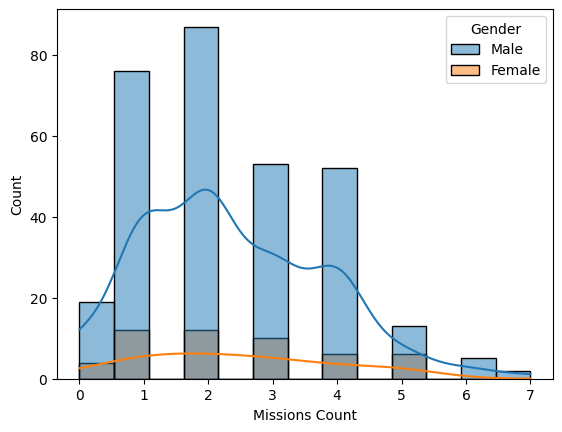

In [ ]:
sns.histplot(data=df, x='Missions Count', hue='Gender', kde=True)

B. How many astronauts died on a mission?

In [ ]:
len(df.loc[df['Death Mission'].notnull()])

16

C. How the total number of Space Flights (especially for Males vs Females) have evolved over the years.

<Axes: xlabel='Year', ylabel='space_flight_count'>

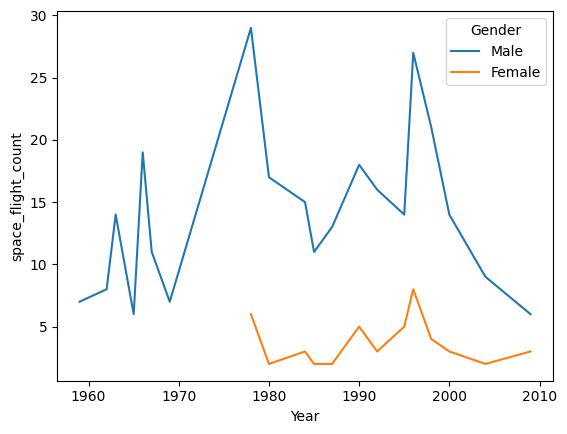

In [ ]:
space_flights = df.groupby(['Year', 'Gender'], as_index=False).agg(
    space_flight_count=('Space Flights', 'count'),
)

sns.lineplot(data=space_flights, x='Year', y='space_flight_count', hue='Gender')

D. Find the most frequest first name of an astronaut for each state.

In [ ]:
name_counts = (
    df.assign(
        first_name = df['Name'].str.split(' ').apply(lambda val: val[0]),
        region = df['Birth Place'].str.split(', ').apply(lambda val: val[1] if len(val) > 1 else val[0])
    ).groupby(['region', 'first_name']).size().reset_index()
)

name_counts.sort_values(['region', 0], ascending=(True, False)).groupby('region').first()

,first_name,0
region,,
AL,Kathryn,2
AR,Richard,1
AZ,Steven,1
Argentina,Fernando,1
Australia,Andrew,1
...,...,...
WA,Bonnie,1
WI,Daniel,1
WV,Jon,1


E. How many astronauts were on a mission in a different century than the one they were born in?

In [ ]:
centuries = df.dropna(subset=['Year']).assign(
    birth_century = df['Birth Date'].str.split('/').apply(lambda val: int(val[2]) + 99) // 100,
    mission_century = (df['Year'] + 99) // 100,
)

tab = pd.crosstab(centuries['birth_century'], centuries['mission_century'])
tab

mission_century,20.0,21.0
birth_century,,
20,310,20


## 1. Data Cleaning

Look for duplicites:

In [ ]:
df.loc[df.duplicated()]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count


We can also look for duplicites only w.r.t. to one feature and not the entire sample (row):

In [ ]:
df.loc[df.duplicated(['Birth Date'])]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
125,Charles D. Gemar,1985.0,11.0,Retired,8/4/1955,"Yanktown, SD",Male,US Military Academy,Engineering,NaN,Lieutenant Colonel,US Army,3,581,0,0.0,"STS-38 (Atlantis), STS-48 (Discovery), STS-62 ...",NaN,NaN,3
183,Scott J. Kelly,1996.0,16.0,Active,2/21/1964,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,Aviation Systems,Captain,US Navy (Retired),4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,NaN,4
238,Steven R. Nagel,1978.0,8.0,Retired,10/27/1946,"Canton, IL",Male,University of Illinois; California State Unive...,Aerospace Engineering,Mechanical Engineering,Colonel,US Air Force (Retired),4,721,0,0.0,"STS 51-G (Discovery), STS 61-A (Challenger), S...",NaN,NaN,4
262,John L. Phillips,1996.0,16.0,Retired,4/15/1951,"Ft. Belvoir, VA",Male,US Naval Academy; University of West Florida; ...,Mathematics; Russian,Aeronautical Systems; Geophysics & Space Physics,Captain,US Naval Reserves (Retired),3,4880,1,5.0,"STS-100 (Endeavor), ISS-11 (Soyuz), STS-119 (D...",NaN,NaN,3
264,Alan G. Poindexter,1998.0,17.0,Deceased,11/5/1961,"Pasadena, CA",Male,Georgia Institute of Technology; US Naval Post...,Aerospace Engineering,Aeronautical Engineering,Captain,US Navy,2,669,0,0.0,"STS-122 (Atlantis), STS-131 (Discovery)",7/1/2012,NaN,2
303,Sherwood C. Spring,1980.0,9.0,Retired,9/23/1944,"Hartford, CT",Male,US Military Academy; University of Arizona,Engineering,Aerospace Engineering,Colonel,US Army (Retired),1,165,2,12.0,STS 61-B (Atlantis),NaN,NaN,1
305,Thomas P. Stafford,1962.0,2.0,Retired,9/17/1930,"Weatherford, OK",Male,US Naval Academy,NaN,NaN,Lieutenant General,US Air Force (Retired),4,507,0,0.0,"Gemini 6, Gemini 9, Apollo 10, Apollo-Soyuz Te...",NaN,NaN,4
319,Kathryn C. Thornton,1984.0,10.0,Retired,8/17/1952,"Montgomery, AL",Female,Auburn University; University of Virginia,Physics,Physics,NaN,NaN,4,975,3,21.0,"STS-33 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,4
329,James S. Voss,1987.0,12.0,Retired,3/3/1949,"Cordova, AL",Male,Auburn University; University of Colorado,Aerospace Engineering,Aerospace Engineering Sciences,Colonel,US Army (Retired),5,4853,4,22.0,"STS-44 (Atlantis), STS-53 (Discovery), STS-69 ...",NaN,NaN,5


Check `Id`s of the original and duplicate samples:

In [ ]:
df.loc[df['Birth Date'] == '8/4/1955']

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
5,Andrew M. Allen,1987.0,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN,3
125,Charles D. Gemar,1985.0,11.0,Retired,8/4/1955,"Yanktown, SD",Male,US Military Academy,Engineering,NaN,Lieutenant Colonel,US Army,3,581,0,0.0,"STS-38 (Atlantis), STS-48 (Discovery), STS-62 ...",NaN,NaN,3


Delete duplicates:

```
keep parameter values:
  'first': Drop duplicates except for the first occurrence.
  'last':  Drop duplicates except for the last occurrence.
  False:   Drop all duplicates.
```

In case we would want to handle duplicites w.r.t. to one column, there is a parameter just for that:

```
df.drop_duplicates(subset=['column1', 'column2'])
```

In [ ]:
df = df.drop_duplicates(keep='first')
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,2
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,2
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,4
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,3
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN,0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,6


Missing data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

We can see that we have sone Null values in columns `Year`, `Group`, `Alma Mater`, `Undergraduate Major`, `Graduate Major`, `Undergraduate Major`, `Graduate Major`, `Military Rank`, `Military Branch`, `Missions`, `Death Date`, and `Death Mission`.



Focus on one feature (`Military Branch`):

In [ ]:
df.loc[df['Military Branch'].isnull()]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count


In [ ]:
bool_series = pd.isnull(df['Military Branch'])
df[bool_series]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,2
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,1
6,Joseph P. Allen,1967.0,6.0,Retired,6/27/1937,"Crawsfordsville, IN",Male,DePauw University; Yale University,Mathematics & Physics,Physics,NaN,NaN,2,313,2,12.0,"ST-5 (Columbia), STS 51-A (Discovery)",NaN,NaN,2
9,Clayton C. Anderson,1998.0,17.0,Retired,2/23/1959,"Omaha, NE",Male,Hastings College; Iowa State University,Physics,Aerospace Engineering,NaN,NaN,2,4005,6,38.0,"STS-117/120 (Atlantis/Discovery), STS-131 (Dis...",NaN,NaN,2
12,Jerome Apt III,1985.0,11.0,Retired,4/18/1949,"Springfield, MA",Male,Harvard University; MIT,Physics,Physics,NaN,NaN,4,847,2,11.0,"STS-37 (Atlantis), STS-47 (Endeavor), STS-59 (...",NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Peggy A. Whitson,1996.0,16.0,Active,2/9/1960,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,Biochemistry,NaN,NaN,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,NaN,3
343,Terrence W. Wilcutt,1990.0,13.0,Management,10/31/1949,"Russellville, KY",Male,Western Kentucky University,Mathematics,NaN,NaN,NaN,4,1008,0,0.0,"STS-68 (Endeavor), STS-79 (Atlantis), STS-89 (...",NaN,NaN,4
349,Stephanie D. Wilson,1996.0,16.0,Active,9/27/1966,"Boston, MA",Female,Harvard University; University of Texas,Engineering Science,Aerospace Engineering,NaN,NaN,3,1031,0,0.0,"STS-121 (Discovery), STS-120 (Discovery), STS-...",NaN,NaN,3
351,Peter J. K. Wisoff,1990.0,13.0,Retired,8/16/1958,"Norfolk, VA",Male,University of Virginia; Stanford University,Physics,Applied Physics,NaN,NaN,4,1064,3,20.0,"STS-57 (Endeavor), STS-68 (Endeavor), STS-81 (...",NaN,NaN,4


Leave the missing value as it is for these features:

*(here the fact that the value is missing indicates an important sample property)*

In [ ]:
df['Group'].fillna('None', inplace=True)
df['Undergraduate Major'].fillna('None', inplace=True)
df['Graduate Major'].fillna('None', inplace=True)
df['Military Rank'].fillna('None', inplace=True)
df['Military Branch'].fillna('None', inplace=True)
df['Death Date'].fillna('None', inplace=True)
df['Death Mission'].fillna('None', inplace=True)
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,None,None,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",None,None,2
1,Loren W. Acton,NaN,None,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,None,None,1,190,0,0.0,STS 51-F (Challenger),None,None,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",None,None,2
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",None,None,4
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",None,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,None,None,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,None,None,3
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,None,None,0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,None,None,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",None,None,6


Fill in with mean:

In [ ]:
df['Year'].fillna(int(df['Year'].mean(numeric_only=True)), inplace=True)
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,None,None,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",None,None,2
1,Loren W. Acton,1985.0,None,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,None,None,1,190,0,0.0,STS 51-F (Challenger),None,None,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",None,None,2
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",None,None,4
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",None,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,None,None,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,None,None,3
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,None,None,0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,None,None,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",None,None,6


Remove rows with missing value(s):

In [ ]:
df.dropna(subset=['Alma Mater'], how='all', inplace=True)
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,None,None,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",None,None,2
1,Loren W. Acton,1985.0,None,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,None,None,1,190,0,0.0,STS 51-F (Challenger),None,None,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",None,None,2
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",None,None,4
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",None,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,None,None,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,None,None,3
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,None,None,0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,None,None,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",None,None,6


Quick check that our dataset no longer contains any missing values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 356
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 356 non-null    object 
 1   Year                 356 non-null    float64
 2   Group                356 non-null    object 
 3   Status               356 non-null    object 
 4   Birth Date           356 non-null    object 
 5   Birth Place          356 non-null    object 
 6   Gender               356 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  356 non-null    object 
 9   Graduate Major       356 non-null    object 
 10  Military Rank        356 non-null    object 
 11  Military Branch      356 non-null    object 
 12  Space Flights        356 non-null    int64  
 13  Space Flight (hr)    356 non-null    int64  
 14  Space Walks          356 non-null    int64  
 15  Space Walks (hr)     356 non-null    flo

## 2. Feature manipulation:

#### Categorical features encoding:

(`object` type from `df.info()`)

In [ ]:
df_transformed = df.copy()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):
    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns
        return result

Example - encoding the `Status` feature:

In [ ]:
df_transformed['Status'].value_counts()

Retired       219
Deceased       51
Active         50
Management     36
Name: Status, dtype: int64

In [ ]:
ohe_status = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_status_df = pd.DataFrame(ohe_status.fit_transform(df_transformed[['Status']]))
df_transformed = df_transformed.join(ohe_status_df)
df_transformed

Index(['Status_Active', 'Status_Deceased', 'Status_Management',
       'Status_Retired'],
      dtype='object')


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Missions Count,Status_Active,Status_Deceased,Status_Management,Status_Retired
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",None,None,2,1,0,0,0
1,Loren W. Acton,1985.0,None,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,0,0.0,STS 51-F (Challenger),None,None,1,0,0,0,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",None,None,2,0,0,0,1
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,...,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",None,None,4,0,0,0,1
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,...,2,8.0,"Gemini 12, Apollo 11",None,None,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,...,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,None,None,3,0,0,0,1
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,...,0,0.0,NaN,None,None,0,0,0,0,1
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,...,1,0.5,Apollo 15,None,None,1,0,0,0,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,...,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",None,None,6,0,0,0,1


`Gender` gets handled the same way:

In [ ]:
ohe_gender = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_gender_df = pd.DataFrame(ohe_gender.fit_transform(df_transformed[['Gender']]))
df_transformed = df_transformed.join(ohe_gender_df)
df_transformed

Index(['Gender_Female', 'Gender_Male'], dtype='object')


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Missions,Death Date,Death Mission,Missions Count,Status_Active,Status_Deceased,Status_Management,Status_Retired,Gender_Female,Gender_Male
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,"STS-119 (Discovery), ISS-31/32 (Soyuz)",None,None,2,1,0,0,0,0,1
1,Loren W. Acton,1985.0,None,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,STS 51-F (Challenger),None,None,1,0,0,0,1,0,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,"STS-28 (Columbia), STS-43 (Atlantis)",None,None,2,0,0,0,1,0,1
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,...,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",None,None,4,0,0,0,1,0,1
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,...,"Gemini 12, Apollo 11",None,None,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,...,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,None,None,3,0,0,0,1,0,1
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,...,NaN,None,None,0,0,0,0,1,0,1
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,...,Apollo 15,None,None,1,0,0,0,1,0,1
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,...,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",None,None,6,0,0,0,1,0,1


What about features with more distinct values?

In [ ]:
df_transformed['Military Rank'].value_counts()

None                    150
Colonel                  94
Captain                  68
Commander                13
Lieutenant Colonel       10
Major                     5
Major General             4
Brigadier General         4
Lieutenant Commander      3
Lieutenant General        2
Rear Admiral              2
Vice Admiral              1
Name: Military Rank, dtype: int64

In [ ]:
df_transformed['Military Branch'].value_counts()

None                               146
US Air Force (Retired)              61
US Navy (Retired)                   59
US Air Force                        21
US Navy                             21
US Marine Corps (Retired)           17
US Army (Retired)                   12
US Army                              4
US Air Force Reserves (Retired)      3
US Marine Corps                      3
US Marine Corps Reserves             2
US Coast Guard (Retired)             2
US Naval Reserves                    2
US Air Force Reserves                2
US Naval Reserves (Retired)          1
Name: Military Branch, dtype: int64

In [ ]:
df_transformed['Alma Mater'].value_counts()

US Naval Academy                                                 12
US Naval Academy; US Naval Postgraduate School                   11
US Air Force Academy; Purdue University                           7
Purdue University                                                 7
MIT                                                               5
                                                                 ..
University of Rochester; California Institute of Technology       1
California Polytechnic Institute                                  1
Muskingum College                                                 1
Southeast Missouri State; University of Missouri                  1
MIT; University of Texas-Austin; George Washington University     1
Name: Alma Mater, Length: 280, dtype: int64

In [ ]:
df_transformed['Undergraduate Major'].value_counts()

Physics                                  35
Aerospace Engineering                    33
Mechanical Engineering                   30
Aeronautical Engineering                 28
Electrical Engineering                   23
                                         ..
Astronomy                                 1
Marine Engineering & Nautical Science     1
Philosophy                                1
Bioscience                                1
Military Science                          1
Name: Undergraduate Major, Length: 84, dtype: int64

In [ ]:
df_transformed['Graduate Major'].value_counts()

None                                          58
Aeronautical Engineering                      27
Aerospace Engineering                         21
Medicine                                      16
Physics                                       15
                                              ..
Engineering Mechanics; Business Management     1
Information Systems                            1
Public Health; Medicine                        1
Aeronautical Engineering Systems               1
Physics; Business Management                   1
Name: Graduate Major, Length: 144, dtype: int64

Binning of majors based on simple key words:

In [ ]:
def get_superior_category(major_str):
  if 'engineer' in major_str.lower():
    return 'Engineering'
  elif 'bio' in major_str.lower() or 'science' in major_str.lower() or 'astro' in major_str.lower() or 'physics' in major_str.lower() or 'math' in major_str.lower() or 'inf' in major_str.lower():
    return 'Science'
  elif 'med' in major_str.lower() or 'doctor' in major_str.lower() or 'health' in major_str.lower():
    return 'Medicine'
  elif 'business' in major_str.lower() or 'management' in major_str.lower():
    return 'Business'
  elif 'None' == major_str:
    return 'None'
  return 'Different'

df_transformed['Graduate Major'] = df_transformed.apply(lambda row: get_superior_category(row['Graduate Major']), axis=1)
df_transformed['Graduate Major'].value_counts()

Engineering    153
Science         80
None            58
Different       31
Medicine        24
Business        10
Name: Graduate Major, dtype: int64

In [ ]:
ohe_grad = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_grad_df = pd.DataFrame(ohe_grad.fit_transform(df_transformed[['Graduate Major']]))
df_transformed = df_transformed.join(ohe_grad_df)
df_transformed

Index(['Graduate Major_Business', 'Graduate Major_Different',
       'Graduate Major_Engineering', 'Graduate Major_Medicine',
       'Graduate Major_None', 'Graduate Major_Science'],
      dtype='object')


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Status_Management,Status_Retired,Gender_Female,Gender_Male,Graduate Major_Business,Graduate Major_Different,Graduate Major_Engineering,Graduate Major_Medicine,Graduate Major_None,Graduate Major_Science
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Different,...,0,0,0,1,0,1,0,0,0,0
1,Loren W. Acton,1985.0,None,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Science,...,0,1,0,1,0,0,0,0,0,1
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Engineering,...,0,1,0,1,0,0,1,0,0,0
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Science,...,0,1,0,1,0,0,0,0,0,1
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Science,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,...,0,1,0,1,0,0,0,1,0,0
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Science,...,0,1,0,1,0,0,0,0,0,1
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Engineering,...,0,1,0,1,0,0,1,0,0,0
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,...,0,1,0,1,0,0,0,0,1,0


#### Numerical feature scaling:

In [ ]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
numerical_features

['Year',
 'Space Flights',
 'Space Flight (hr)',
 'Space Walks',
 'Space Walks (hr)',
 'Missions Count']

<Axes: xlabel='Year', ylabel='Count'>

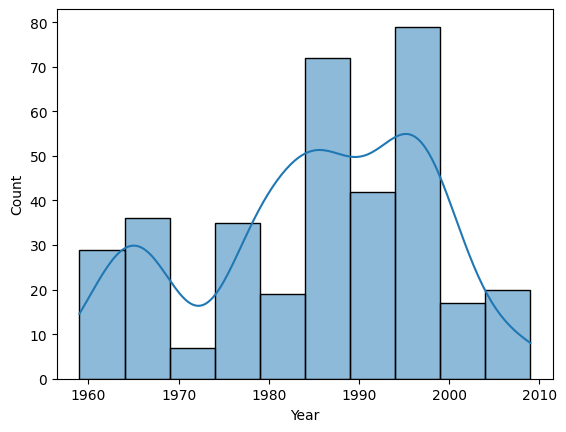

In [ ]:
sns.histplot(data=df, x='Year', kde=True)

<Axes: xlabel='Space Flight (hr)', ylabel='Count'>

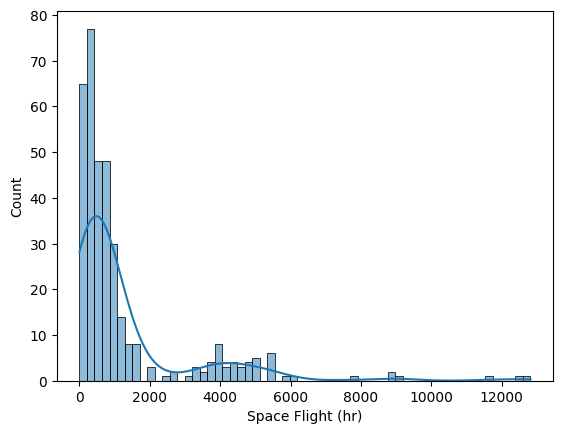

In [ ]:
sns.histplot(data=df, x='Space Flight (hr)', kde=True)

In [ ]:
# from sklearn import preprocessing

# standard_scaler = preprocessing.StandardScaler(copy=True)
# df_transformed.loc[:,['Year', 'Missions Count']] = standard_scaler.fit_transform(df_transformed[['Year', 'Missions Count']])
# df_transformed.loc[:,numerical_features]

,Year,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions Count
0,1.487722,-0.257893,1.083762,0.364799,0.394490,-0.261736
1,-0.007738,-0.958730,-0.560323,-0.607999,-0.578439,-0.962324
2,-0.086447,-0.257893,-0.484369,-0.607999,-0.578439,-0.261736
3,0.149679,1.143783,-0.231189,1.337598,1.591942,1.139439
4,-1.739323,-0.257893,-0.508104,0.364799,0.020287,-0.261736
...,...,...,...,...,...,...
352,0.385804,0.442945,1.472498,2.796795,2.490030,0.438851
353,1.015471,-1.659568,-0.660539,-0.607999,-0.578439,-1.662912
354,-1.503198,-0.958730,-0.504940,-0.121600,-0.541018,-0.962324
355,-1.818032,2.545458,-0.220113,0.851199,0.918375,2.540615


In [ ]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler(copy=True)
df_transformed.loc[:,numerical_features] = standard_scaler.fit_transform(df_transformed[numerical_features])
df_transformed.loc[:,numerical_features]

,Year,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions Count
0,1.487722,-0.257893,1.083762,0.364799,0.394490,-0.261736
1,-0.007738,-0.958730,-0.560323,-0.607999,-0.578439,-0.962324
2,-0.086447,-0.257893,-0.484369,-0.607999,-0.578439,-0.261736
3,0.149679,1.143783,-0.231189,1.337598,1.591942,1.139439
4,-1.739323,-0.257893,-0.508104,0.364799,0.020287,-0.261736
...,...,...,...,...,...,...
352,0.385804,0.442945,1.472498,2.796795,2.490030,0.438851
353,1.015471,-1.659568,-0.660539,-0.607999,-0.578439,-1.662912
354,-1.503198,-0.958730,-0.504940,-0.121600,-0.541018,-0.962324
355,-1.818032,2.545458,-0.220113,0.851199,0.918375,2.540615


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df_transformed.loc[:,numerical_features] = min_max_scaler.fit_transform(df_transformed[numerical_features])
df_transformed.loc[:,numerical_features]

,Year,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions Count
0,0.90,0.285714,0.257997,0.2,0.194030,0.285714
1,0.52,0.142857,0.014823,0.0,0.000000,0.142857
2,0.50,0.285714,0.026057,0.0,0.000000,0.285714
3,0.56,0.571429,0.063504,0.4,0.432836,0.571429
4,0.08,0.285714,0.022546,0.2,0.119403,0.285714
...,...,...,...,...,...,...
352,0.62,0.428571,0.315494,0.7,0.611940,0.428571
353,0.78,0.000000,0.000000,0.0,0.000000,0.000000
354,0.14,0.142857,0.023015,0.1,0.007463,0.142857
355,0.06,0.857143,0.065143,0.3,0.298507,0.857143


*Data format specifics:*

*Images - data augmentations*

*Text - tokenization*

## 3. Feature Selection

- correlation matrix

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-65-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Year,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions Count
Year,1.000000,0.035812,0.328147,0.207361,0.250491,0.029883
Space Flights,0.035812,1.000000,0.324263,0.255905,0.257543,0.997249
Space Flight (hr),0.328147,0.324263,1.000000,0.472282,0.453901,0.324605
Space Walks,0.207361,0.255905,0.472282,1.000000,0.985742,0.259164
Space Walks (hr),0.250491,0.257543,0.453901,0.985742,1.000000,0.261360
Missions Count,0.029883,0.997249,0.324605,0.259164,0.261360,1.000000


In [ ]:
# df.drop(['Missions Count'], axis=1, inplace=True)

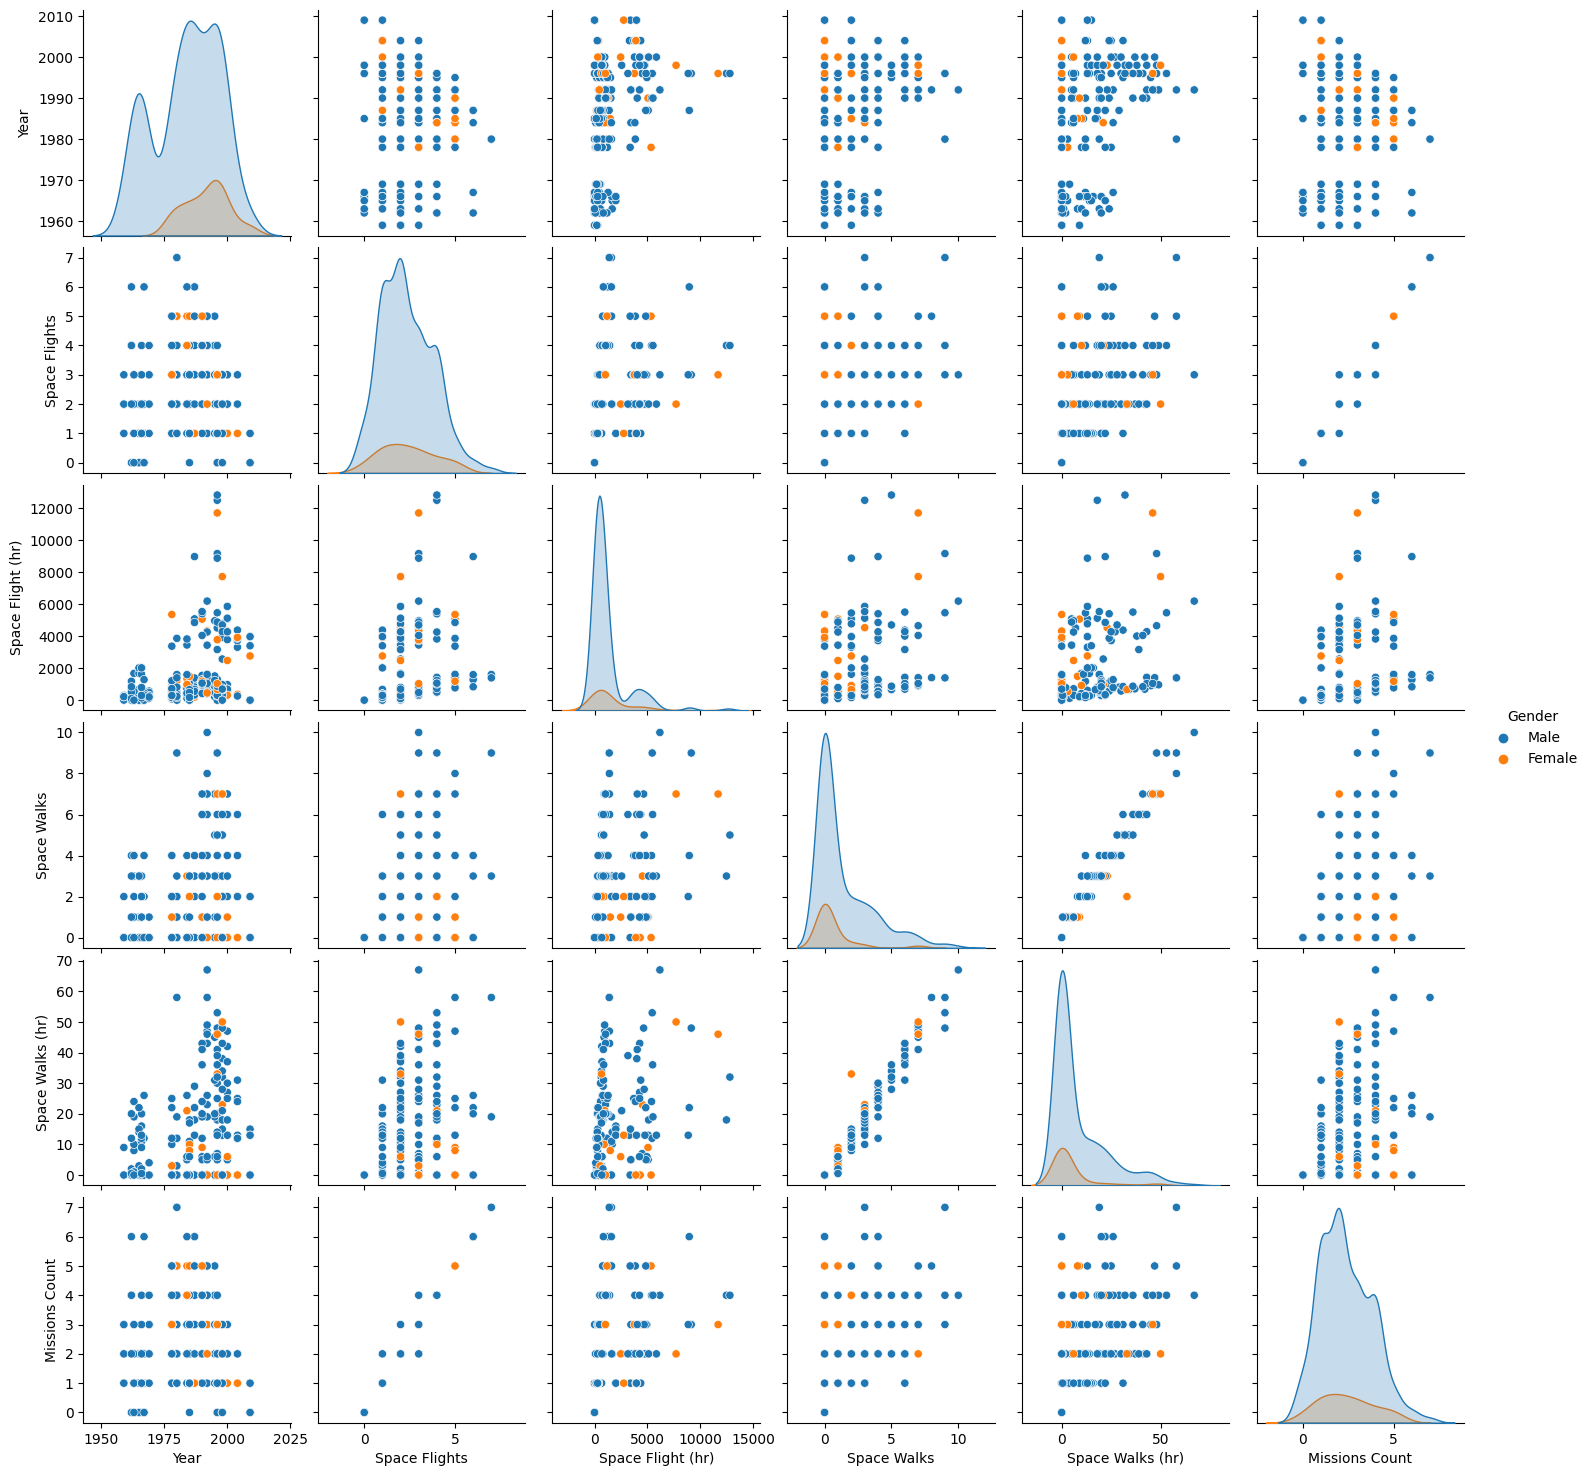

In [ ]:
sns.pairplot(df, hue='Gender')

## 4. Dimensionality reduction

#### PCA:

In [ ]:
# select only numerical features
df_numerical = df_transformed.select_dtypes(include='number')
df_numerical

,Year,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions Count,Status_Active,Status_Deceased,Status_Management,Status_Retired,Gender_Female,Gender_Male,Graduate Major_Business,Graduate Major_Different,Graduate Major_Engineering,Graduate Major_Medicine,Graduate Major_None,Graduate Major_Science
0,0.90,0.285714,0.257997,0.2,0.194030,0.285714,1,0,0,0,0,1,0,1,0,0,0,0
1,0.52,0.142857,0.014823,0.0,0.000000,0.142857,0,0,0,1,0,1,0,0,0,0,0,1
2,0.50,0.285714,0.026057,0.0,0.000000,0.285714,0,0,0,1,0,1,0,0,1,0,0,0
3,0.56,0.571429,0.063504,0.4,0.432836,0.571429,0,0,0,1,0,1,0,0,0,0,0,1
4,0.08,0.285714,0.022546,0.2,0.119403,0.285714,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.62,0.428571,0.315494,0.7,0.611940,0.428571,0,0,0,1,0,1,0,0,0,1,0,0
353,0.78,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,1,0,1,0,0,0,0,0,1
354,0.14,0.142857,0.023015,0.1,0.007463,0.142857,0,0,0,1,0,1,0,0,1,0,0,0
355,0.06,0.857143,0.065143,0.3,0.298507,0.857143,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df_numerical)

# join the PCA info with our original df:

components = pd.DataFrame(components)
df_transformed['PCA 0'] = components[0]
df_transformed['PCA 1'] = components[1]

In [ ]:
import plotly.express as px

def show_reduced_dimensions_interactive(color_column, x='PCA 0', y='PCA 1'):
  fig = px.scatter(df_transformed,
                  x=x,
                  y=y,
                  color=color_column,
                  hover_name='Name',
                  hover_data=['Year', 'Group', 'Status', 'Birth Date',
                              'Birth Place', 'Gender', 'Alma Mater',
                              'Undergraduate Major', 'Graduate Major',
                              'Military Rank', 'Military Branch',
                              'Space Flights', 'Space Flight (hr)',
                              'Space Walks', 'Space Walks (hr)', 'Missions',
                              'Death Date', 'Death Mission', 'Missions Count']
                  )
  fig.show()

show_reduced_dimensions_interactive('Gender')

In [ ]:
show_reduced_dimensions_interactive('Status')

#### T-SNE:

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_numerical)
tsne_results = pd.DataFrame(tsne_results)
df_transformed['TSNE 0'] = tsne_results[0]
df_transformed['TSNE 1'] = tsne_results[1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 356 samples in 0.001s...
[t-SNE] Computed neighbors for 356 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 356 / 356
[t-SNE] Mean sigma: 0.522664
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.636795
[t-SNE] KL divergence after 300 iterations: 0.347152


In [ ]:
show_reduced_dimensions_interactive('Gender', 'TSNE 0', 'TSNE 1')

In [ ]:
show_reduced_dimensions_interactive('Status', 'TSNE 0', 'TSNE 1')

## 5. Splitting data to train and test sets (dataset sampling):

- handling class inbalance

In [ ]:
df['Status'].value_counts()

Retired       219
Deceased       51
Active         50
Management     36
Name: Status, dtype: int64

In [ ]:
X = df_transformed[['PCA 0', 'PCA 1']]
Y = df_transformed['Status']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    train_size=100,
                                                    test_size=0.2)
y_train.value_counts()

Retired       57
Deceased      18
Active        14
Management    11
Name: Status, dtype: int64

In [ ]:
y_test.value_counts()

Retired       46
Active        11
Deceased       8
Management     7
Name: Status, dtype: int64

Accuracy: 62.5 %


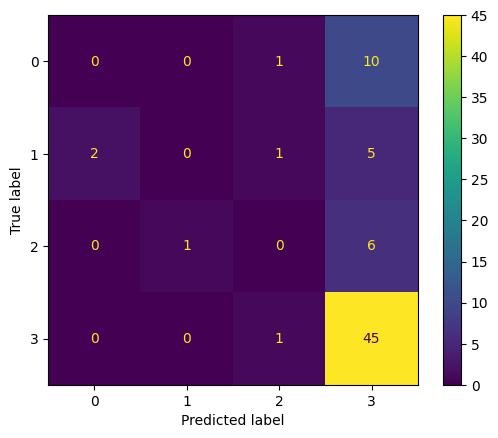

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train, y_train)

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

Now what happens if our dataset was balanced?

In [ ]:
df_transformed_balanced = df_transformed.groupby('Status').sample(n=100, random_state=42, replace=True)
# but doing this can cause data leakage betwen train and test sets!
df_transformed_balanced['Status'].value_counts()

Active        100
Deceased      100
Management    100
Retired       100
Name: Status, dtype: int64

In [ ]:
X_balanced = df_transformed_balanced[['PCA 0', 'PCA 1']]
Y_balanced = df_transformed_balanced['Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced,
                                                    Y_balanced,
                                                    train_size=100,
                                                    test_size=0.2)
y_train.value_counts()

Deceased      33
Management    25
Retired       22
Active        20
Name: Status, dtype: int64

In [ ]:
y_test.value_counts()

Deceased      26
Active        19
Management    19
Retired       16
Name: Status, dtype: int64

Accuracy: 32.5 %


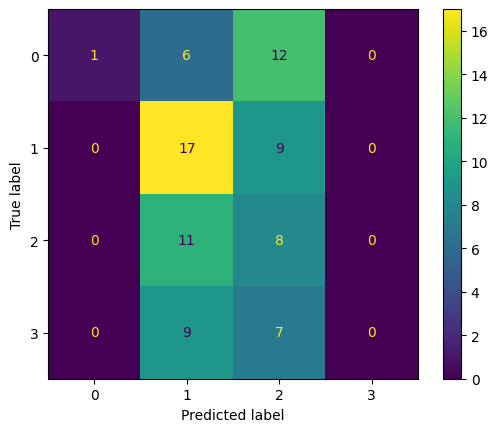

In [ ]:
classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train, y_train)

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

Just for completion: as we can see from PCA (or T-SNE) visualization, our problem is not easily linearly separable => it doesn't make sense to use such machine learning approach. A decision tree (or Random Forest) is a better idea, but our resulting accuracy can still be not ideal, since we don't have many samples.